In [51]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:

df= pd.read_csv('kc_house_data.csv')


In [54]:
df.shape

(21613, 21)

In [55]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [57]:
df1  = df.drop(['id','date'],axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df1.shape

(21613, 19)

In [59]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [60]:
df.isnull().values.sum()

2

In [61]:
df1 = df1.dropna()

In [62]:
df1.isnull().values.sum()

0

In [63]:
target = df1.iloc[:,0].name

In [64]:
target

'price'

In [65]:
features = df1.iloc[:, 1:].columns.tolist()

In [66]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [67]:
# Correlations of features with target variable
correlations = df1.corr()
correlations['price']

price            1.000000
bedrooms         0.308366
bathrooms        0.525150
sqft_living      0.702055
sqft_lot         0.089661
floors           0.256814
waterfront       0.266371
view             0.397299
condition        0.036379
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323842
yr_built         0.054006
yr_renovated     0.126436
zipcode         -0.053182
lat              0.307010
long             0.021613
sqft_living15    0.585377
sqft_lot15       0.082448
Name: price, dtype: float64

In [68]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036379
yr_built        0.054006
yr_renovated    0.126436
zipcode         0.053182
long            0.021613
sqft_lot15      0.082448
Name: price, dtype: float64

In [69]:

df = df1.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

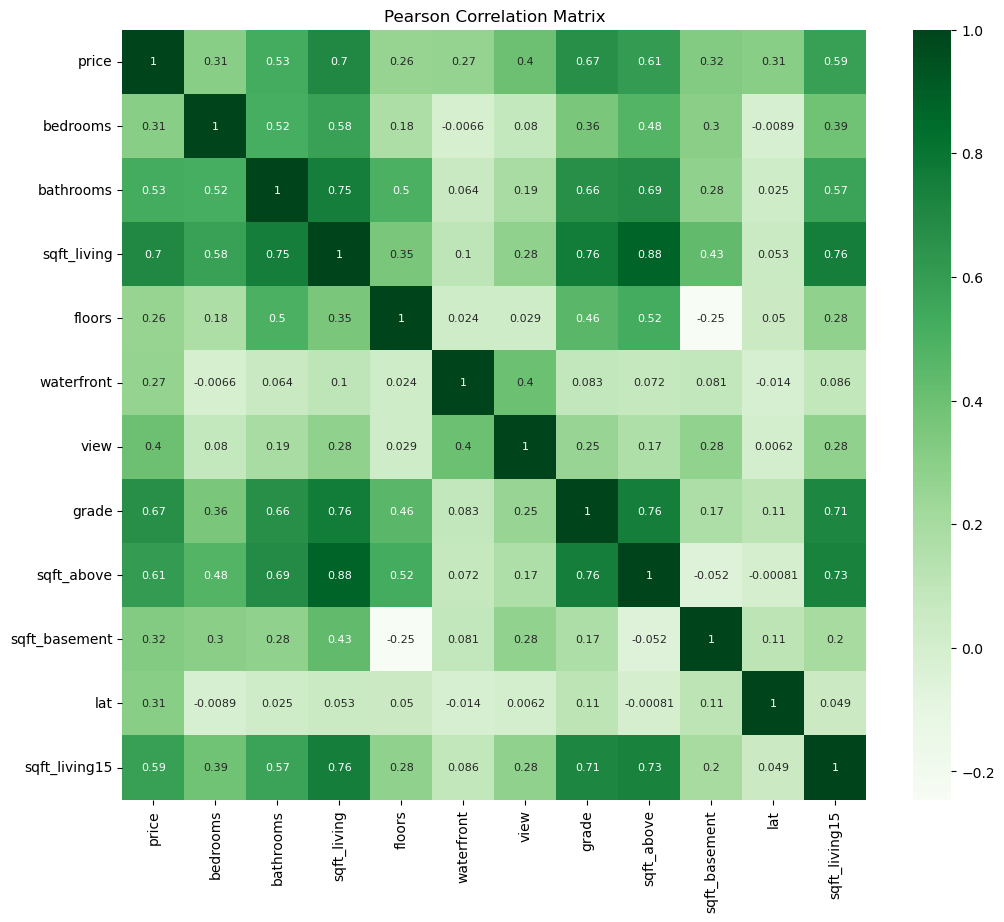

In [70]:
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [71]:
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754684,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754684,1.0,-,-,-,0.762727,0.876644,-,-,0.75644
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762727,-,-,-,1.0,0.755924,-,-,-
sqft_above,-,-,-,0.876644,-,-,-,0.755924,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [72]:
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)


In [73]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features


9

In [74]:
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [75]:
# Create X, y and theta
X = df.iloc[:, 1:]
# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(21611, 10)
[[-0.86665137 -0.39870231 -1.44748548 -0.97978169 -0.91542309 -0.08717468
  -0.30576786 -0.55881445 -0.65867952  1.        ]
 [-0.00567906 -0.39870231  0.1755602   0.53368313  0.93641706 -0.08717468
  -0.30576786 -0.55881445  0.24530111  1.        ]
 [-0.98077582 -1.47386523 -1.44748548 -1.42619937 -0.91542309 -0.08717468
  -0.30576786 -1.40951459 -0.65867952  1.        ]
 [ 0.17408739  0.67646061  1.14938761 -0.13049927 -0.91542309 -0.08717468
  -0.30576786 -0.55881445  1.39787642  1.        ]
 [-0.08194361 -0.39870231 -0.14904893 -0.43536988 -0.91542309 -0.08717468
  -0.30576786  0.29188568 -0.65867952  1.        ]
 [ 1.86552619  0.67646061  3.09704243  3.63683042 -0.91542309 -0.08717468
  -0.30576786  2.84398609  2.79904641  1.        ]
 [-0.76968644 -0.39870231  0.1755602  -0.39726106  0.93641706 -0.08717468
  -0.30576786 -0.55881445 -0.65867952  1.        ]
 [-0.67612618 -0.39870231 -0.7982672  -1.11044052 -0.91542309 -0.08717468
  -0.30576786 -0.55881445 -0.65867952  

In [76]:
y = df.iloc[:, 0:1].values

In [77]:
y.shape

(21611, 1)

In [78]:
X.shape

(21611, 10)

In [79]:
# Diviser les données en ensembles d'apprentissage et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# Créer un objet de modèle de régression linéaire multiple
model = LinearRegression()

In [81]:
# Former le modèle sur l'ensemble d'apprentissage
model.fit(X, y)

LinearRegression()

In [82]:
# Prédire les prix de vente sur l'ensemble de test
y_pred = model.predict(X)


In [83]:
y_pred

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [84]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [85]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [86]:
coef_determination(y, y_pred)

1.0